Earlier we saw the effiectives of GPR for a one dimensional case. Now lets consider a 2D case. Again first we will consider a simple 2D autonomous system as follows.

$$
\begin{align}
    \frac{dx_1}{dt} &= x_2 - 0.5*x_1 \\
    \frac{dx_2}{dt} &= sin(x_1)
\end{align}
$$


#### Solution for the sytem of equations

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

# defining the system
def myfunc(t,x):
    x1,x2 = x[0],x[1]
    dx_dt = np.zeros(np.shape(x))
    dx_dt[0] = x2-0.5*x1
    dx_dt[1] = np.sin(x1)
    return dx_dt

# defining initial conditions
x0 = [-2,2]
tSpan = [0,15]
nideal = 10000
t = np.linspace(*tSpan, nideal)

#integrating the ode system
int_func = solve_ivp(myfunc, tSpan, x0,dense_output = True)

# solution
x = int_func.sol(t)


#### Data collection stategies
From 1d case we know that the collecting data uinformly in time doesnt provide an appealing data colletion strategy.
To convince ourselves again let us look at how data collected uniformly in time would look on a phase portrait.

For now, again we will collect 12 data points.

In [4]:
nData=15
tDataUT = np.linspace(*tSpan,nData)
xDataUT = int_func.sol(tDataUT)
vDataUT = myfunc(tDataUT,xDataUT)

tDataUT = tDataUT.reshape(-1,1)
xDataUT = np.transpose(xDataUT)
vDataUT_componet1 = vDataUT[0,:].reshape(-1,1)
vDataUT_componet2 = vDataUT[1,:].reshape(-1,1)

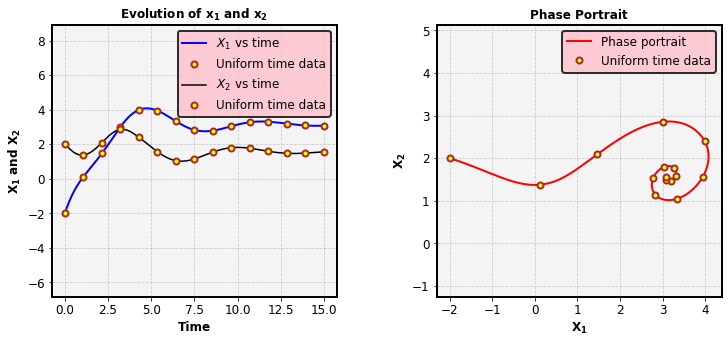

In [717]:
# Plotting the phase trajectories and evolutions.
fig, axs = plt.subplots(1,2,figsize=(12,5))
vDataUT = myfunc(tDataUT,xDataUT)
vDataUT = np.transpose(vDataUT)
# setting titles
axs[(1)].set_title("Phase Portrait",fontweight="bold",fontsize=12)
axs[(0)].set_title("Evolution of $\mathbf{x_1}$ and $\mathbf{x_2}$",fontweight="bold",fontsize=12)
#axs[(2)].set_title("Evolution of $\mathbf{\\frac{dx_1}{dt}}$ and $\mathbf{\\frac{dx_2}{dt}}$",fontweight="bold",fontsize=12)

# setting x and y labels
axs[(1)].set_xlabel("$\mathbf{X_1}$", fontweight = "bold", fontsize= 12)
axs[(0)].set_xlabel("Time",fontweight="bold", fontsize=12)
#axs[(2)].set_xlabel("Time",fontweight="bold", fontsize=12)

axs[(1)].set_ylabel("$\mathbf{X_2}$", fontweight = "bold", fontsize= 12)
axs[(0)].set_ylabel("$\mathbf{X_1}$ and $\mathbf{X_2}$",fontweight="bold", fontsize=12)
#axs[(2)].set_ylabel("$\mathbf{\\frac{dx_1}{dt}}$ and $\mathbf{\\frac{dx_2}{dt}}$",fontweight="bold", fontsize=12)

# plots 
axs[(1)].plot(x[0],x[1], "r-", linewidth=2, label="Phase portrait")
axs[(1)].plot(xDataUT[:,0],xDataUT[:,1],  color="brown", marker = "o", linestyle="", markeredgewidth=2, markerfacecolor="yellow",label="Uniform time data")
axs[(0)].plot(t,x[0], "b-", linewidth =2, label= "$X_1$ vs time") 
axs[(0)].plot(tDataUT,xDataUT[:,0], color="brown", marker = "o", linestyle="", markeredgewidth=2, markerfacecolor="yellow",label="Uniform time data")
axs[(0)].plot(t,x[1],"k-", linewidth = 1.5, label= "$X_2$ vs time")
axs[(0)].plot(tDataUT,xDataUT[:,1], color="brown", marker = "o", linestyle="", markeredgewidth=2, markerfacecolor="yellow",label="Uniform time data")
# common aspects
_ = [0,1]
for __ in _:
    axs[(__)].set_facecolor("#f4f4f4")
    axs[(__)].grid(True, linestyle ="--", alpha=0.6)
    axs[(__)].axis("equal")
    spinesDict = ["top", "bottom", "left", "right"]
    for spineValue in spinesDict:
        axs[(__)].spines[spineValue].set_linewidth(2)
    axs[(__)].tick_params(labelsize=12, direction="out")
    legend = axs[(__)].legend(loc="best",fontsize=12)
    legend.get_frame().set_linewidth(2)
    legend.get_frame().set_edgecolor("black")
    legend.get_frame().set_facecolor("pink")

plt.subplots_adjust(wspace=0.35)
plt.savefig("11UTdata2dtoy.pdf")

**Note**:
Clearly we observe and can understand that collecting daa uniformly in time would result in higher number of data points where the speed is the lowest. Think about it. When we are doing NN training, if I am colecting data uniformly, then definitely I am training the NN more near the low speed points. Hence, it might not predict very well at the high speed points, which might significantly effect the trajectories!

Let us introduce another data collection strategy called as uniform distance data collection in the phase portrait.

#### Uniform distance data collection strategy

Given the $X_1$ and $X_2$'s evolution with time, we have their corresponding phase portrait. So let us collect data from the phase protrat with equal seperation between the adjacent points.

For this we need to define the concept of speed which is 
$$speed(x_1,x_2)=\sqrt{(\frac{dx_1}{dt})^2 + (\frac{dx_2}{dt})^2}$$

The length of the contour is given by 
$$length = \int^{t=t_2}_{t=t_1}{speed(x_1,x_2)*dt}  $$

Now given the length and the number of datapoints we can find the length of the line segment and hence start collecting the points. 

Let us implement it for this problem.

In [5]:
# Determining the speed
v = myfunc(t,x)
# given t,x myfunc gives velocity vector v as a column.
# for a given t, when there are multiple Xs each column would provide the velocity vector at the corresponding x

speed = np.linalg.norm(v,axis=0)
# speed would be the column wise norm then

tStep = t[1]-t[0]
# assumning uniform time step

# total Contour length
dx = speed*tStep
# length of each dx interval. t_step is the time interval between two consequtive time points.

length = np.sum(dx)
# total length of the interval is the sum of all small dx

segLength = length/(nData-1)
#segLength is the seperation between two consequtive data points

index=np.zeros(nData).astype(int)

index[0]=0

ii =1
_ = 1
varLength=0
for __ in dx:
    varLength= varLength + __
    if (varLength>=segLength):
        index[ii]= _
        varLength = 0
        ii = ii+1
    _ = _+1

index[-1] = nideal-1


#### uniform distance data

In [6]:
tDataUD = t[index]
xDataUD = int_func.sol(tDataUD)
vDataUD = myfunc(tDataUD,xDataUD)
vDataUD = np.transpose(vDataUD)

tDataUD = tDataUD.reshape(-1,1)
xDataUD = np.transpose(xDataUD)
vDataUD_componet1 = vDataUD[:,0].reshape(-1,1)
vDataUD_componet2 = vDataUD[:,1].reshape(-1,1)

In [7]:
xDataUD

array([[-2.        ,  2.        ],
       [-1.2975397 ,  1.74643515],
       [-0.5959068 ,  1.47962751],
       [ 0.13919363,  1.37935397],
       [ 0.83443783,  1.64215918],
       [ 1.4479298 ,  2.07577574],
       [ 2.06535615,  2.49784019],
       [ 2.74553814,  2.80330468],
       [ 3.48483745,  2.80943912],
       [ 4.02494629,  2.31707963],
       [ 3.95986083,  1.59532137],
       [ 3.43130426,  1.08292454],
       [ 2.77547686,  1.22841451],
       [ 3.09365701,  1.81060611],
       [ 3.07090237,  1.5609153 ]])

In [9]:
vDataUD_componet2

array([[-0.90929743],
       [-0.96289714],
       [-0.56125949],
       [ 0.13874459],
       [ 0.74091908],
       [ 0.9924614 ],
       [ 0.88017772],
       [ 0.38578129],
       [-0.33654438],
       [-0.77287132],
       [-0.72996325],
       [-0.28567586],
       [ 0.35799136],
       [ 0.04791729],
       [ 0.07063142]])

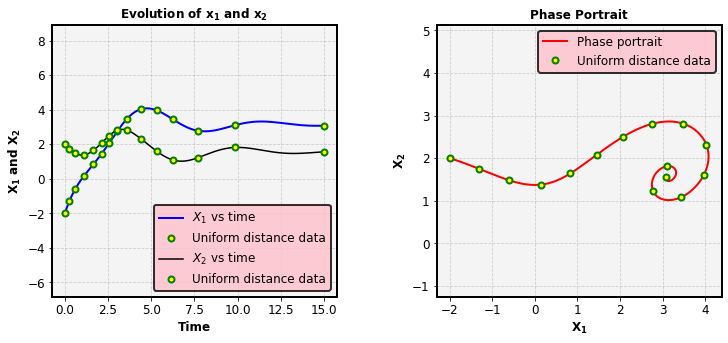

In [692]:
# Plotting the phase trajectories and evolutions.
fig, axs = plt.subplots(1,2,figsize=(12,5))

# setting titles
axs[(1)].set_title("Phase Portrait",fontweight="bold",fontsize=12)
axs[(0)].set_title("Evolution of $\mathbf{x_1}$ and $\mathbf{x_2}$",fontweight="bold",fontsize=12)
#axs[(2)].set_title("Evolution of $\mathbf{\\frac{dx_1}{dt}}$ and $\mathbf{\\frac{dx_2}{dt}}$",fontweight="bold",fontsize=12)

# setting x and y labels
axs[(1)].set_xlabel("$\mathbf{X_1}$", fontweight = "bold", fontsize= 12)
axs[(0)].set_xlabel("Time",fontweight="bold", fontsize=12)
#axs[(2)].set_xlabel("Time",fontweight="bold", fontsize=12)

axs[(1)].set_ylabel("$\mathbf{X_2}$", fontweight = "bold", fontsize= 12)
axs[(0)].set_ylabel("$\mathbf{X_1}$ and $\mathbf{X_2}$",fontweight="bold", fontsize=12)
#axs[(2)].set_ylabel("$\mathbf{\\frac{dx_1}{dt}}$ and $\mathbf{\\frac{dx_2}{dt}}$",fontweight="bold", fontsize=12)

# plots 
axs[(1)].plot(x[0],x[1], "r-", linewidth=2, label="Phase portrait")
axs[(1)].plot(xDataUD[:,0],xDataUD[:,1],  color="green", marker = "o", linestyle="", markeredgewidth=2, markerfacecolor="yellow",label="Uniform distance data")
axs[(0)].plot(t,x[0], "b-", linewidth =2, label= "$X_1$ vs time") 
axs[(0)].plot(tDataUD,xDataUD[:,0], color="green", marker = "o", linestyle="", markeredgewidth=2, markerfacecolor="yellow",label="Uniform distance data")
axs[(0)].plot(t,x[1],"k-", linewidth = 1.5, label= "$X_2$ vs time")
axs[(0)].plot(tDataUD,xDataUD[:,1], color="green", marker = "o", linestyle="", markeredgewidth=2, markerfacecolor="yellow",label="Uniform distance data")
# common aspects
_ = [0,1]
for __ in _:
    axs[(__)].set_facecolor("#f4f4f4")
    axs[(__)].grid(True, linestyle ="--", alpha=0.6)
    axs[(__)].axis("equal")
    spinesDict = ["top", "bottom", "left", "right"]
    for spineValue in spinesDict:
        axs[(__)].spines[spineValue].set_linewidth(2)
    axs[(__)].tick_params(labelsize=12, direction="out")
    legend = axs[(__)].legend(loc="best",fontsize=12)
    legend.get_frame().set_linewidth(2)
    legend.get_frame().set_edgecolor("black")
    legend.get_frame().set_facecolor("pink")

plt.subplots_adjust(wspace=0.35)
plt.savefig("52DEvolPhasPort.pdf")

#### GPR to the Uniform time case

In [694]:
# Importing the GPR libraries.
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF

ker_comp1_UT = 1 * RBF(length_scale=np.array([1.0,1.0]), length_scale_bounds=(1e-5, 1e5))
gpr_comp1_UT = GaussianProcessRegressor(kernel=ker_comp1_UT, n_restarts_optimizer=9)
gpr_comp1_UT.fit(xDataUT, vDataUT_componet1)
gpr_comp1_UT.kernel_

/home/ponnana/.local/lib/python3.10/site-packages/sklearn/gaussian_process/_gpr.py:663: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  _check_optimize_result("lbfgs", opt_res)
/home/ponnana/.local/lib/python3.10/site-packages/sklearn/gaussian_process/kernels.py:455: ConvergenceWarning: The optimal value found for dimension 0 of parameter k1__constant_value is close to the specified upper bound 100000.0. Increasing the bound and calling fit again may find a better value.
  warnings.warn(


316**2 * RBF(length_scale=[993, 625])

In [695]:
ker_comp2_UT = 1 * RBF(length_scale=np.array([1.0,1.0]), length_scale_bounds=(1e-5, 1e9))
gpr_comp2_UT = GaussianProcessRegressor(kernel=ker_comp2_UT, n_restarts_optimizer=9)
gpr_comp2_UT.fit(xDataUT, vDataUT_componet2)
gpr_comp2_UT.kernel_

/home/ponnana/.local/lib/python3.10/site-packages/sklearn/gaussian_process/_gpr.py:663: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  _check_optimize_result("lbfgs", opt_res)


1.86**2 * RBF(length_scale=[2.53, 3.41e+08])

We obtained $\frac{dx_1}{dt} and \frac{dx_2}{dt}$ as a function of $x_1$ and $x_2$. We will integrate using solve_ivp and predict how the system is evolving.

In [685]:
# Defining Gaussuian functions suitable for using solve_ivp
def gpr_UT(t,x):
    # x = np.array(x)
    # x = np.transpose(x)
    v1_UT_GPR = gpr_comp1_UT.predict([x])
    v2_UT_GPR = gpr_comp1_UT.predict([x])
    v_UT_GPR = np.vstack((v1_UT_GPR,v2_UT_GPR))
    v_UT_GPR = np.squeeze(v_UT_GPR.reshape(1,-1))
    return v_UT_GPR

In [686]:

gprfunIntegrate = solve_ivp(gpr_UT,tSpan,x0,dense_output=True)
xGPR_UT = gprfunIntegrate.sol(np.squeeze(tDataUT))
xGPR_UT=np.squeeze(xGPR_UT)

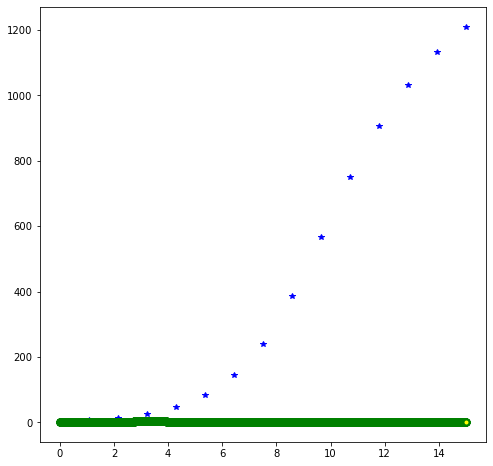

In [687]:
fig,axs = plt.subplots(1,1,figsize=[8,8])

#axs.plot(t, x, "r", linewidth = 4,label=r"Numerical Solution", linestyle="dotted")
axs.plot(tDataUT, xGPR_UT[1,:],"b*", label="GPR Mean prediction")
axs.plot(t, x[1,:], "go", markeredgewidth =2, markerfacecolor = "yellow",label="Data to construct GPR")

We can see the failure of this. Lets try it on uniform distance data collection strategy.

In [697]:
# Importing the GPR libraries.
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF

ker_comp1_UD = 1 * RBF(length_scale=np.array([1.0,1.0]), length_scale_bounds=(1e-5, 1e5))
gpr_comp1_UD = GaussianProcessRegressor(kernel=ker_comp1_UT, n_restarts_optimizer=9)
gpr_comp1_UD.fit(xDataUD, vDataUD_componet1)
gpr_comp1_UD.kernel_

/home/ponnana/.local/lib/python3.10/site-packages/sklearn/gaussian_process/_gpr.py:663: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  _check_optimize_result("lbfgs", opt_res)
/home/ponnana/.local/lib/python3.10/site-packages/sklearn/gaussian_process/kernels.py:455: ConvergenceWarning: The optimal value found for dimension 0 of parameter k1__constant_value is close to the specified upper bound 100000.0. Increasing the bound and calling fit again may find a better value.
  warnings.warn(


316**2 * RBF(length_scale=[1.31e+03, 628])

In [698]:
ker_comp2_UD = 1 * RBF(length_scale=np.array([1.0,1.0]), length_scale_bounds=(1e-5, 1e9))
gpr_comp2_UD = GaussianProcessRegressor(kernel=ker_comp2_UT, n_restarts_optimizer=9)
gpr_comp2_UD.fit(xDataUD, vDataUD_componet2)
gpr_comp2_UD.kernel_

/home/ponnana/.local/lib/python3.10/site-packages/sklearn/gaussian_process/_gpr.py:663: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  _check_optimize_result("lbfgs", opt_res)
/home/ponnana/.local/lib/python3.10/site-packages/sklearn/gaussian_process/kernels.py:455: ConvergenceWarning: The optimal value found for dimension 1 of parameter k2__length_scale is close to the specified upper bound 1000000000.0. Increasing the bound and calling fit again may find a better value.
  warnings.warn(


2.5**2 * RBF(length_scale=[2.85, 1e+09])

In [706]:
# Defining Gaussuian functions suitable for using solve_ivp
def gpr_UD(t,x):
    # x = np.array(x)
    # x = np.transpose(x)
    v1_UD_GPR = gpr_comp1_UD.predict([x])
    v2_UD_GPR = gpr_comp1_UD.predict([x])
    v_UD_GPR = np.vstack((v1_UD_GPR,v2_UD_GPR))
    v_UD_GPR = np.squeeze(v_UD_GPR.reshape(1,-1))
    return v_UD_GPR


gprfunIntegrate = solve_ivp(gpr_UD,tSpan,x0,dense_output=True)
xGPR_UD = gprfunIntegrate.sol(np.squeeze(t))
xGPR_UD=np.squeeze(xGPR_UD)

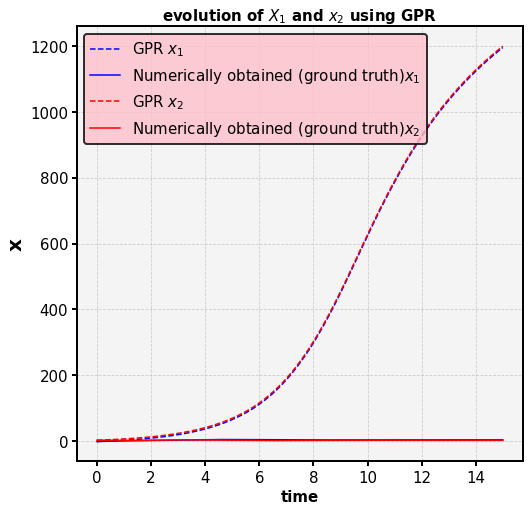

In [715]:
# plotting GPR curves
fig,axs = plt.subplots(1,1,figsize=[8,8])

# Plotting the Phase trajectory
axs.set_title("evolution of $X_1$ and $x_2$ using GPR", fontweight = "bold", fontsize=15)
axs.set_xlabel("time", fontsize=15,fontweight="bold")
axs.set_ylabel("x",fontsize=20,fontweight="bold")
axs.set_facecolor("#f4f4f4")
axs.grid(True,linestyle="--", alpha=0.6)

spines_dir = ["top","bottom", "left", "right"]
for spine_value in spines_dir:
    axs.spines[spine_value].set_linewidth(2)
axs.tick_params(axis="both", length=5, width=2, direction="out",labelsize=15)

axs.plot(t, xGPR_UD[0,:],"b--", label="GPR $x_1$")
axs.plot(t, x[0,:], "b-", markeredgewidth =2, markerfacecolor = "yellow",label="Numerically obtained (ground truth)$x_1$")
axs.plot(t, xGPR_UD[1,:],"r--", label="GPR $x_2$")
axs.plot(t, x[1,:], "r-", markeredgewidth =2, markerfacecolor = "yellow",label="Numerically obtained (ground truth)$x_2$")

legend = axs.legend(loc= "best",fontsize=15)
legend.get_frame().set_edgecolor("black")
legend.get_frame().set_linewidth(2)
legend.get_frame().set_facecolor("pink")
plt.savefig("8x1evol2dtoy.pdf")

#axs.plot(t, x, "r", linewidth = 4,label=r"Numerical Solution", linestyle="dotted")
